## Imports

In [511]:
import xml.etree.ElementTree as ET
import pandas as pd
import glob
import errno
from matplotlib import pyplot as plt
import cv2
import numpy as np
import lhl_image_transform as lhl
import importlib
import imutils
import lhl_build_dataframe as lhl_build
importlib.reload(lhl_build)
importlib.reload(lhl)

## Load Image Files and Annotations

In [512]:
train_numbers_df = pd.DataFrame()

path = './data/bp_bg_meters/train_annotations/*.xml'   
files = glob.glob(path)   
image_id = 0
for name in files: 
    try:
        print("Parsing file", name)
        annotation_xml = ET.parse(name)
        image_path = annotation_xml.getroot().find('path').text
        box_id = 0
        for box in annotation_xml.getroot().findall('object'):
            box_class = box.find("name").text
            
            box_coords = box.find('bndbox')
            box_xmin = box_coords.find('xmin').text
            box_ymin = box_coords.find('ymin').text
            box_xmax = box_coords.find('xmax').text
            box_ymax = box_coords.find('ymax').text
            
            train_number_row = pd.Series({
                    'image_id': image_id,
                    'image_path': image_path,
                    'box_order': box_id,
                    'class': box_class, 
                    'xmin': box_xmin, 
                    'ymin': box_ymin, 
                    'xmax': box_xmax,
                    'ymax': box_ymax
            }) 
            train_numbers_df = train_numbers_df.append(train_number_row, ignore_index=True)
            box_id += 1
        image_id += 1
    except IOError as exc:
        if exc.errno != errno.EISDIR: # Do not fail if a directory is found, just ignore it.
            raise # Propagate IOError.

Parsing file ./data/bp_bg_meters/train_annotations/IMG_5839.xml
Parsing file ./data/bp_bg_meters/train_annotations/20150528_133325.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_3904.xml
Parsing file ./data/bp_bg_meters/train_annotations/20150528_132007.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_1915.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_5794.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_5958.xml
Parsing file ./data/bp_bg_meters/train_annotations/20150528_133250.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_4688.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_9347.xml
Parsing file ./data/bp_bg_meters/train_annotations/20150528_133318.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_6128.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMAG0076.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_5810.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_5838.xml
Parsing file

In [80]:
train_numbers_df.head(10)

,box_order,class,image_id,image_path,xmax,xmin,ymax,ymin
0,0.0,1,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2166,1740,2070,1799
1,1.0,5,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2186,1710,1775,1514
2,2.0,0,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2131,1690,1535,1194
3,3.0,9,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2661,2165,1785,1469
4,4.0,4,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2601,2135,1455,1154
5,5.0,7,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,3141,2655,1725,1339
6,6.0,7,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,3126,2620,1380,1114
7,0.0,4,1.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2201,1480,1693,1232
8,1.0,4,1.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2176,1485,1158,767
9,0.0,6,2.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2296,1270,2020,1474


In [312]:
train_numbers_df.shape

(1086, 8)

In [498]:
test_numbers_df = pd.DataFrame()

In [499]:
path = './data/bp_bg_meters/test_annotations/*.xml'   
files = glob.glob(path)   
image_id = train_numbers_df.shape[0] + 1
for name in files: 
    try:
        print("Parsing file", name)
        annotation_xml = ET.parse(name)
        image_path = annotation_xml.getroot().find('path').text
        box_id = 0
        for box in annotation_xml.getroot().findall('object'):
            box_class = box.find("name").text
            
            box_coords = box.find('bndbox')
            box_xmin = box_coords.find('xmin').text
            box_ymin = box_coords.find('ymin').text
            box_xmax = box_coords.find('xmax').text
            box_ymax = box_coords.find('ymax').text
            
            test_number_row = pd.Series({
                    'image_id': image_id,
                    'image_path': image_path,
                    'box_order': box_id,
                    'class': box_class, 
                    'xmin': box_xmin, 
                    'ymin': box_ymin, 
                    'xmax': box_xmax,
                    'ymax': box_ymax
            }) 
            test_numbers_df = test_numbers_df.append(test_number_row, ignore_index=True)
            box_id += 1
        image_id += 1
    except IOError as exc:
        if exc.errno != errno.EISDIR: # Do not fail if a directory is found, just ignore it.
            raise # Propagate other IOErrors.

Parsing file ./data/bp_bg_meters/test_annotations/IMG_0028.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_5811.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMAG0077.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_3051.xml
Parsing file ./data/bp_bg_meters/test_annotations/20150528_133319.xml
Parsing file ./data/bp_bg_meters/test_annotations/20150528_101546.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_4892.xml
Parsing file ./data/bp_bg_meters/test_annotations/20150528_133251.xml
Parsing file ./data/bp_bg_meters/test_annotations/20170817_132809.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_5959.xml
Parsing file ./data/bp_bg_meters/test_annotations/20170817_124716.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_5965.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_9838.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_1294.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_5780.xml
Parsing file ./data/

## Data Exploration

In [500]:
train_numbers_df = train_numbers_df.append(test_numbers_df)
train_numbers_df.shape

(2190, 8)

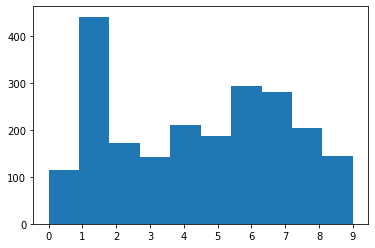

In [317]:
plt.hist(train_numbers_df['class'].sort_values(ascending=True))
plt.show()

## Fix any images that are in landscape

In [514]:
train_numbers_df['width'] = train_numbers_df['xmax'].astype(int) - train_numbers_df['xmin'].astype(int)
train_numbers_df['height'] = train_numbers_df['ymax'].astype(int) - train_numbers_df['ymin'].astype(int)

train_numbers_df['portrait'] = train_numbers_df.apply(
    (lambda x: 1 if x['width'] < x['height'] else 0)
, axis=1)

In [502]:
image_orientation_df = train_numbers_df.groupby('image_id').agg({'portrait':'max'}).reset_index()
image_orientation_df.head()

,image_id,portrait
0,0.0,0
1,1.0,0
2,2.0,0
3,3.0,0
4,4.0,1


In [503]:
train_numbers_df = train_numbers_df.drop(columns=['portrait'])

In [504]:
train_numbers_df = pd.merge(train_numbers_df, image_orientation_df, on='image_id')

In [505]:
train_numbers_df.set_index(['image_id',"portrait"]).count(level='portrait')

,box_order,class,image_path,xmax,xmin,ymax,ymin,width,height
portrait,,,,,,,,,
0,1630,1630,1630,1630,1630,1630,1630,1630,1630
1,560,560,560,560,560,560,560,560,560


In [324]:
# 1630 landscape, 560 portrait

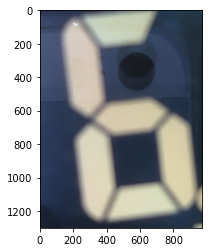

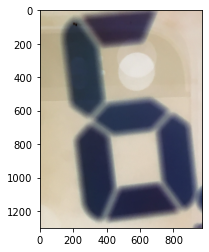

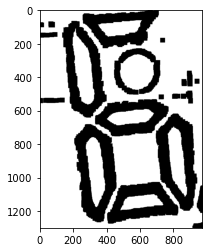

In [481]:
#id_x = 1152
#id_x = 152
id_x = 666
img_test = train_numbers_df.loc[id_x]['img_num_arr']
lhl.plot_image(img_test)
img_inv_test = train_numbers_df.loc[id_x]['img_inv_arr']
lhl.plot_image(img_inv_test)
img_test2 = lhl.img_process(img_inv_test)
lhl.plot_image(img_test2)


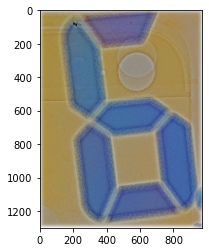

(1301, 971, 3)


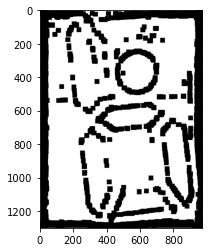

In [482]:

retina = cv2.bioinspired_Retina.create((img_test.shape[1], img_test.shape[0]))
for i in range(5):
    retina.run(img_inv_test)
# get our processed image :)
retinaOut_parvo = retina.getParvo()
#retinaOut_parvo = retina.getMagno()
lhl.plot_image(retinaOut_parvo)
print(retinaOut_parvo.shape)
img_test2 = lhl.img_process(retinaOut_parvo,
                gray=True, 
                flatten=True, 
                close_erode=True, 
                flatten_2=False,
                threshold_block_size=91,
                erode_iterations=2)

lhl.plot_image(img_test2)

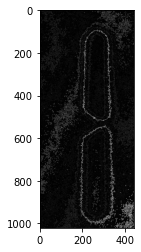

In [451]:
img_test2 = lhl.img_process(img_test, gray=True, 
                flatten=False, 
                close_erode=False, 
                flatten_2=False,
                threshold_block_size=161,
                erode_iterations=2)

kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")
kernel2 = np.array((
        [-1, 0, -1],
        [0, 0, 0],
        [-1, 0, -1]), dtype="int")

res = cv2.morphologyEx(img_test2, cv2.MORPH_HITMISS, kernel)



lhl.plot_image(res)
#lhl.plot_image(res2)

### Resize all digits to the same dimensions

In [289]:
# Get the max width of all digits

def get_digit_width(row):
    return row['img_num_arr'].shape[1]

def get_digit_height(row):
    return row['img_num_arr'].shape[0]

train_numbers_df['img_num_width'] = train_numbers_df.apply(
    (lambda x: get_digit_width(x))
, axis=1)



In [290]:
train_numbers_df['img_num_height'] = train_numbers_df.apply(
    (lambda x: get_digit_height(x))
, axis=1)

In [291]:
print("Max width of a digit", train_numbers_df['img_num_width'].max())
print("Max height of a digit", train_numbers_df['img_num_height'].max())

Max width of a digit 971
Max height of a digit 1301


In [292]:
print("Average width of a digit", train_numbers_df['img_num_width'].mean())
print("Average height of a digit", train_numbers_df['img_num_height'].mean())

Average width of a digit 354.1731123388582
Average height of a digit 564.2946593001842


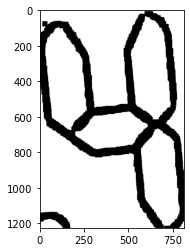

In [277]:
this_img = train_numbers_df.loc[667]['img_num_arr']
this_img_p = lhl.img_process(train_numbers_df.loc[667]['img_num_arr'])

this_img_gray_3d = np.zeros_like(this_img)
this_img_gray_3d[:,:,0] = this_img_p
this_img_gray_3d[:,:,1] = this_img_p
this_img_gray_3d[:,:,2] = this_img_p

lhl.plot_image(this_img_gray_3d)

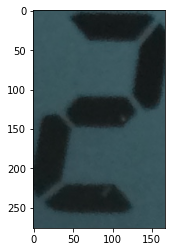

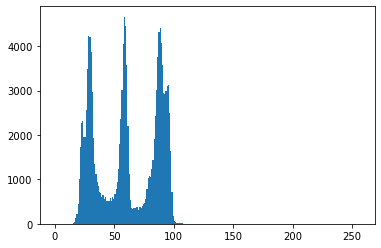

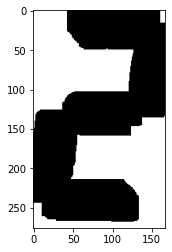

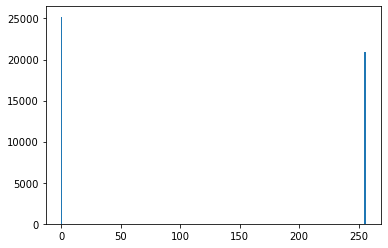

In [260]:
this_img_p = lhl.img_process(train_numbers_df.loc[150]['img_num_arr'])
lhl.plot_image(train_numbers_df.loc[150]['img_num_arr'])
plt.hist(train_numbers_df.loc[150]['img_num_arr'].ravel(),256,[0,256]); plt.show()

lhl.plot_image(this_img_p)
plt.hist(this_img_p.ravel(),256,[0,256]); plt.show()

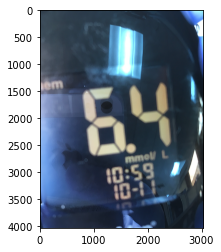

In [231]:
image = cv2.imread(train_numbers_df.loc[666]['image_path'])
lhl.plot_image(image)

In [127]:
train_numbers_df.head()

,box_order,class,image_id,image_path,xmax,xmin,ymax,ymin,width,height,portrait,img_num_arr,img_num_width,img_num_height
0,0.0,1,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2166,1740,2070,1799,426,271,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",271,426
1,1.0,5,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2186,1710,1775,1514,476,261,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",261,476
2,2.0,0,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2131,1690,1535,1194,441,341,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",341,441
3,3.0,9,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2661,2165,1785,1469,496,316,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",316,496
4,4.0,4,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2601,2135,1455,1154,466,301,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",301,466


## Save the dataframe

In [495]:
import pickle

# Put where Docker can find it
filename = "../lighthouse-data-notes/week_11/training_df.pk"
pickle.dump(train_numbers_df, open(filename, 'wb'))